In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



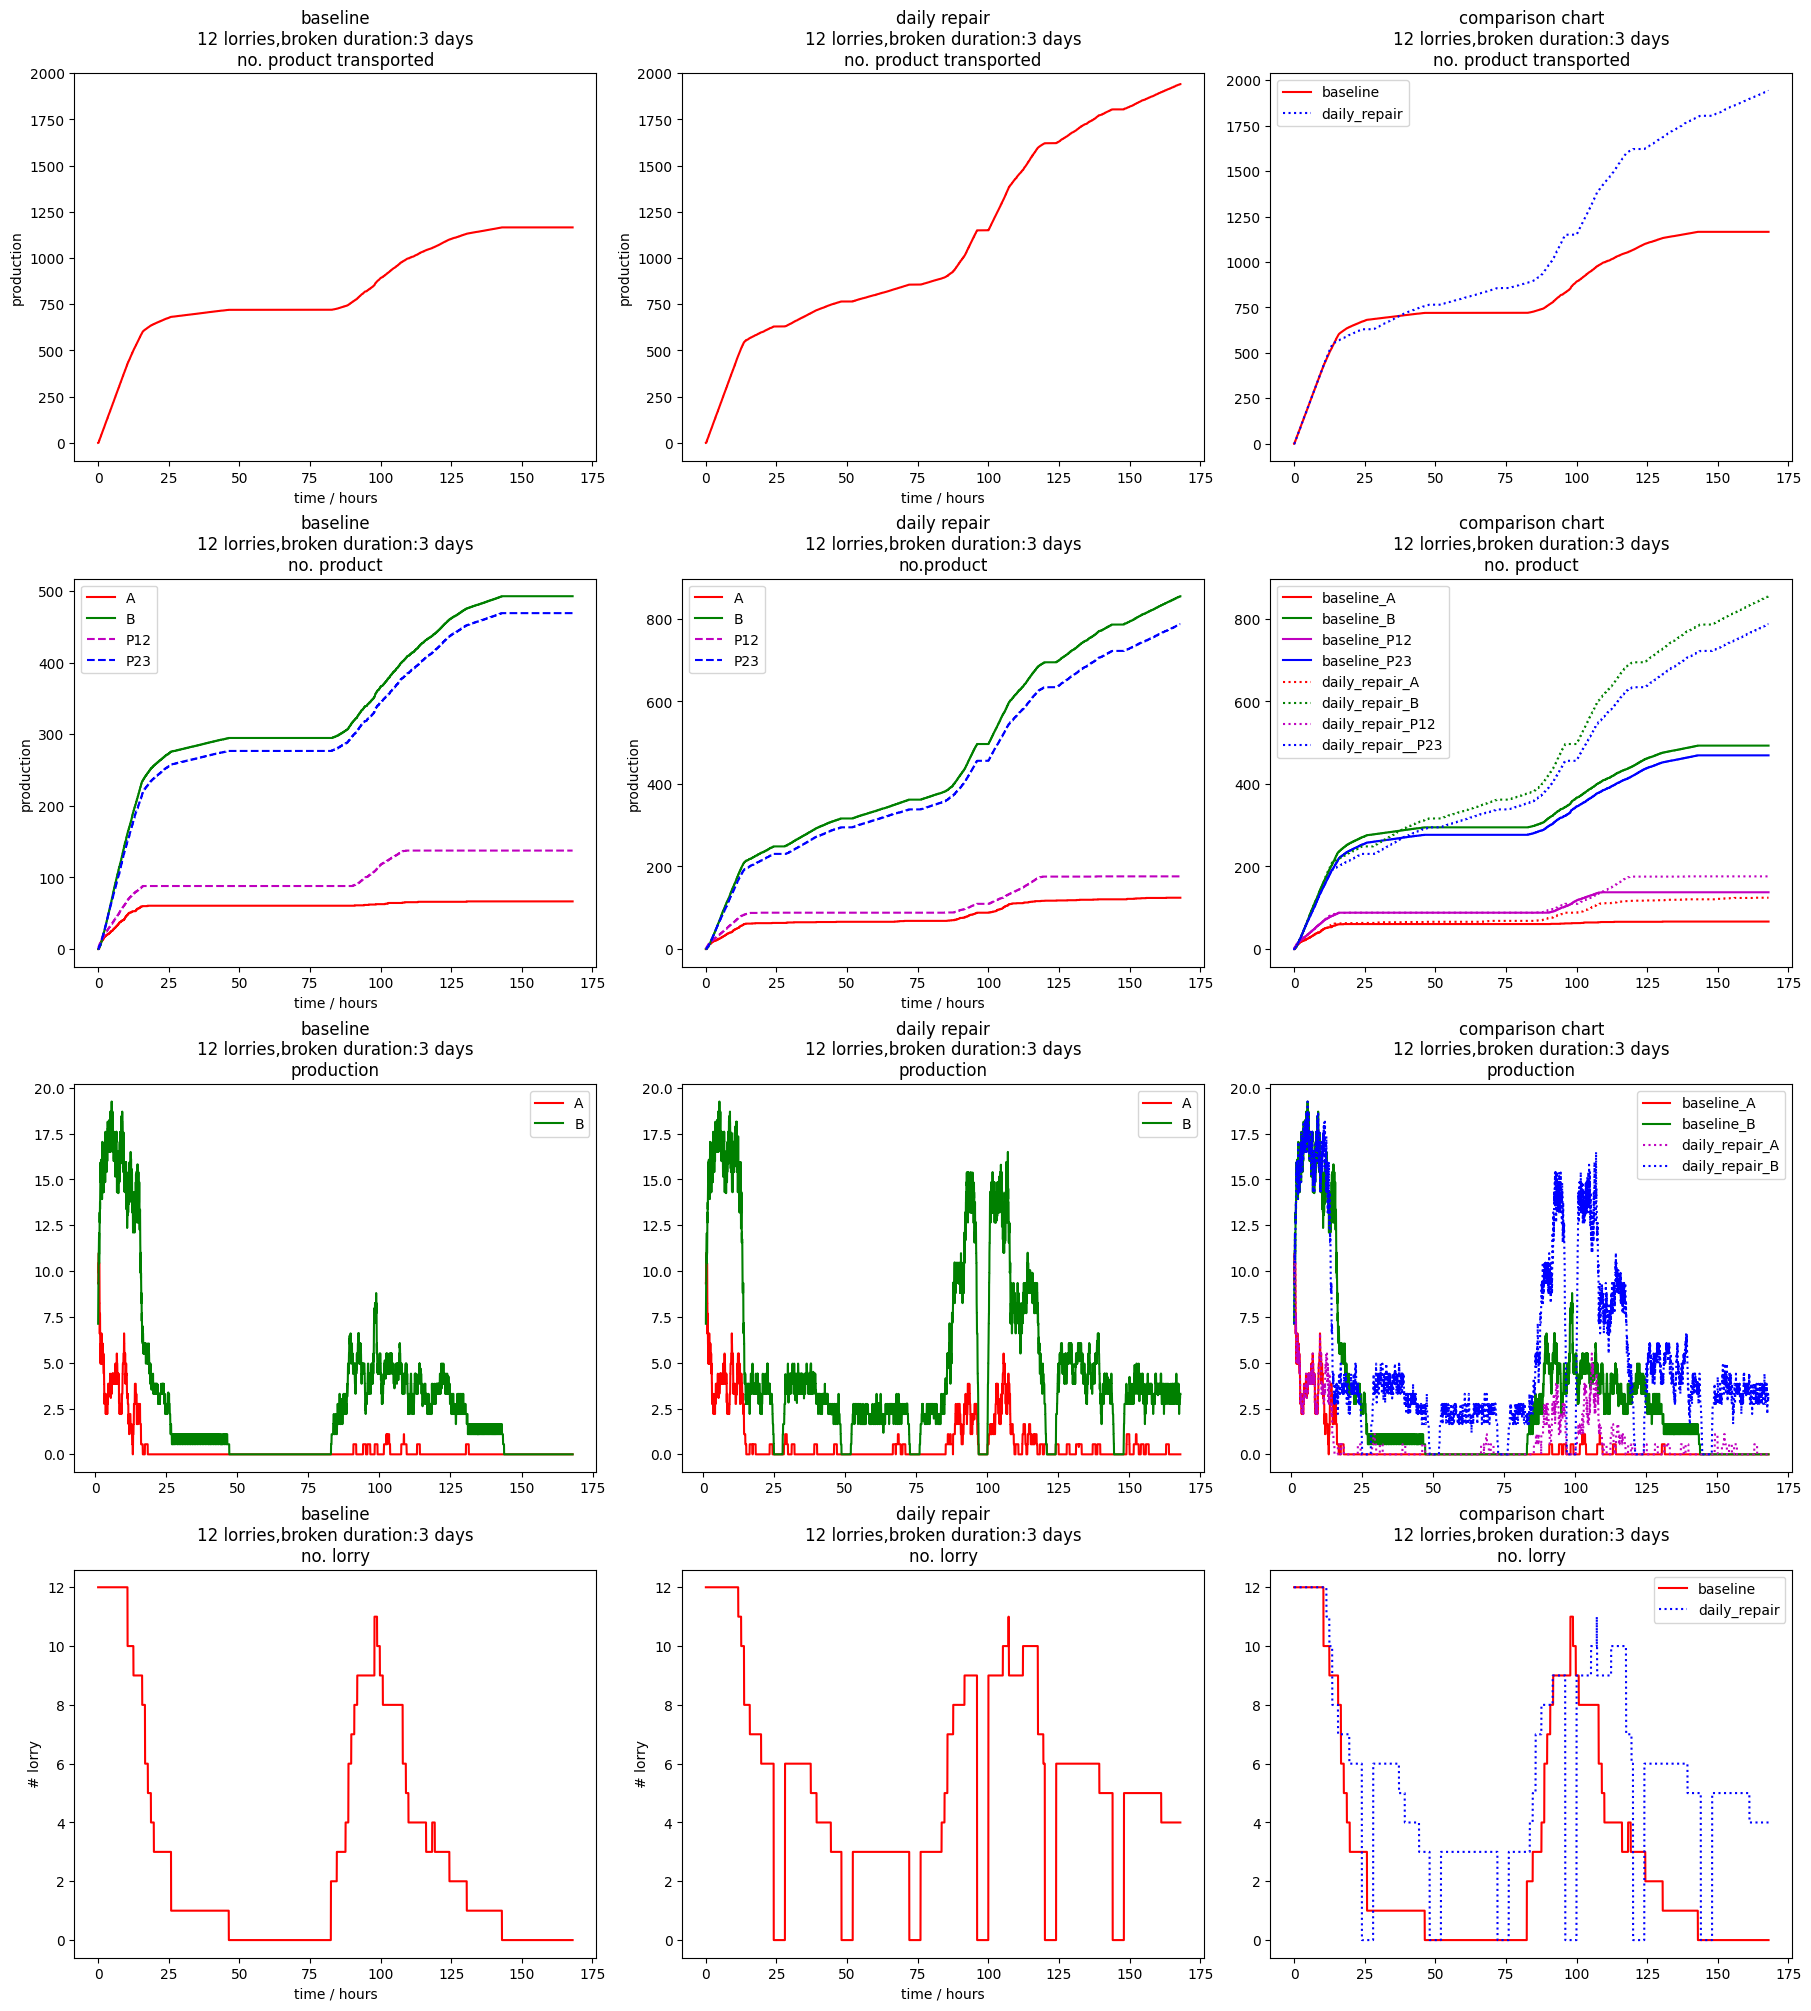

In [5]:
folder = 'result/12lorry_capacity-0.5_broken-3.0_mdp-1.0/'
baseline = pd.read_csv(folder + 'baseline/result.csv')
daily = pd.read_csv(folder + 'repair/result.csv')
# daily['time'] = daily['time'] / 3600
plt_result = [baseline,daily]
result_name = ['baseline\n12 lorries,broken duration:3 days\nno. product','daily repair\n12 lorries,broken duration:3 days\nno.product']

average_periods = 60
baseline_rate = baseline.diff(periods=average_periods)
daily_rate = daily.diff(periods=average_periods)
plt_rate = [baseline_rate, daily_rate]
rate_name = ['baseline\n12 lorries,broken duration:3 days\nproduction','daily repair\n12 lorries,broken duration:3 days\nproduction']

# Transproted product
trans_name = ['baseline\n12 lorries,broken duration:3 days\nno. product transported','daily repair\n12 lorries,broken duration:3 days\nno. product transported']
fig, axs = plt.subplots(4,3, figsize=(18,20), constrained_layout=True)

for ax, tmp_plt, tmp_name in zip(axs[0,0:2].flatten(),plt_result,trans_name):
    ax.plot(tmp_plt['time'].values, (tmp_plt['A']+tmp_plt['P12']+tmp_plt['B']+tmp_plt['P23']).values,'r-')
    ax.set_xlabel('time / hours')
    ax.set_ylabel('production')
    ax.set_ylim([-100,2000])
    ax.set_title(tmp_name)

axs[0,2].plot(baseline['time'].values, (baseline['A'] + baseline['P12'] + baseline['B'] + baseline['P23']).values,'r-', label='baseline')
axs[0,2].plot(daily['time'].values, (daily['A'] + daily['P12'] + daily['B'] + daily['P23']).values,'b:', label='daily_repair')
axs[0,2].legend()
axs[0,2].set_title('comparison chart\n12 lorries,broken duration:3 days\nno. product transported')


for ax, tmp_plt, tmp_name in zip(axs[1,0:2].flatten(),plt_result,result_name):
    ax.plot(tmp_plt['time'].values, tmp_plt['A'].values,'r-', label='A')
    ax.plot(tmp_plt['time'].values, tmp_plt['B'].values,'g-', label='B')
    ax.plot(tmp_plt['time'].values, tmp_plt['P12'].values,'m--', label='P12')
    ax.plot(tmp_plt['time'].values, tmp_plt['P23'].values,'b--', label='P23')
    ax.set_xlabel('time / hours')
    ax.set_ylabel('production')
    # ax.set_ylim([0,1500])
    ax.legend()
    ax.set_title(tmp_name)
    
axs[1,2].plot(baseline['time'].values, baseline['A'].values,'r-', label='baseline_A')
axs[1,2].plot(baseline['time'].values, baseline['B'].values,'g-', label='baseline_B')
axs[1,2].plot(baseline['time'].values, baseline['P12'].values,'m-', label='baseline_P12')
axs[1,2].plot(baseline['time'].values, baseline['P23'].values,'b-', label='baseline_P23')

axs[1,2].plot(daily['time'].values, daily['A'].values,'r:', label='daily_repair_A')
axs[1,2].plot(daily['time'].values, daily['B'].values,'g:', label='daily_repair_B')
axs[1,2].plot(daily['time'].values, daily['P12'].values,'m:', label='daily_repair_P12')
axs[1,2].plot(daily['time'].values, daily['P23'].values,'b:', label='daily_repair__P23')
# axs[0,2].set_ylim([0,1500])
axs[1,2].legend()
axs[1,2].set_title('comparison chart\n12 lorries,broken duration:3 days\nno. product')



for ax, tmp_plt, tmp_name, tmp_result in zip(axs[2,0:2].flatten(),plt_rate,rate_name, plt_result):
    ax.plot(tmp_result['time'].values, tmp_plt['A'].values,'r-', label='A')
    ax.plot(tmp_result['time'].values, tmp_plt['B'].values,'g-', label='B')
    ax.set_title(tmp_name)
    ax.legend()

axs[2,2].plot(baseline['time'].values, baseline_rate['A'].values,'r-', label='baseline_A')
axs[2,2].plot(baseline['time'].values, baseline_rate['B'].values,'g-', label='baseline_B')
axs[2,2].plot(daily['time'].values, daily_rate['A'].values,'m:', label='daily_repair_A')
axs[2,2].plot(daily['time'].values, daily_rate['B'].values,'b:', label='daily_repair_B')
axs[2,2].set_title('comparison chart\n12 lorries,broken duration:3 days\nproduction')
axs[2,2].legend()

lorry_no_name = ['baseline\n12 lorries,broken duration:3 days\nno. lorry','daily repair\n12 lorries,broken duration:3 days\nno. lorry']
for ax, tmp_plt,tmp_name in zip(axs[3,0:2].flatten(), plt_result, lorry_no_name):
    ax.plot(tmp_plt['time'].values, tmp_plt['current_lorry'].values, 'r-')
    ax.set_xlabel('time / hours')
    ax.set_ylabel('# lorry')
    ax.set_title(tmp_name)
    # ax.set_ylim([0,6])

axs[3,2].plot(baseline['time'].values,baseline['current_lorry'].values, 'r-', label='baseline')
axs[3,2].plot(daily['time'].values,daily['current_lorry'].values, 'b:', label='daily_repair')
axs[3,2].set_title('comparison chart\n12 lorries,broken duration:3 days\nno. lorry')
axs[3,2].legend()


Text(0.5, 0.98, 'no. product transported')

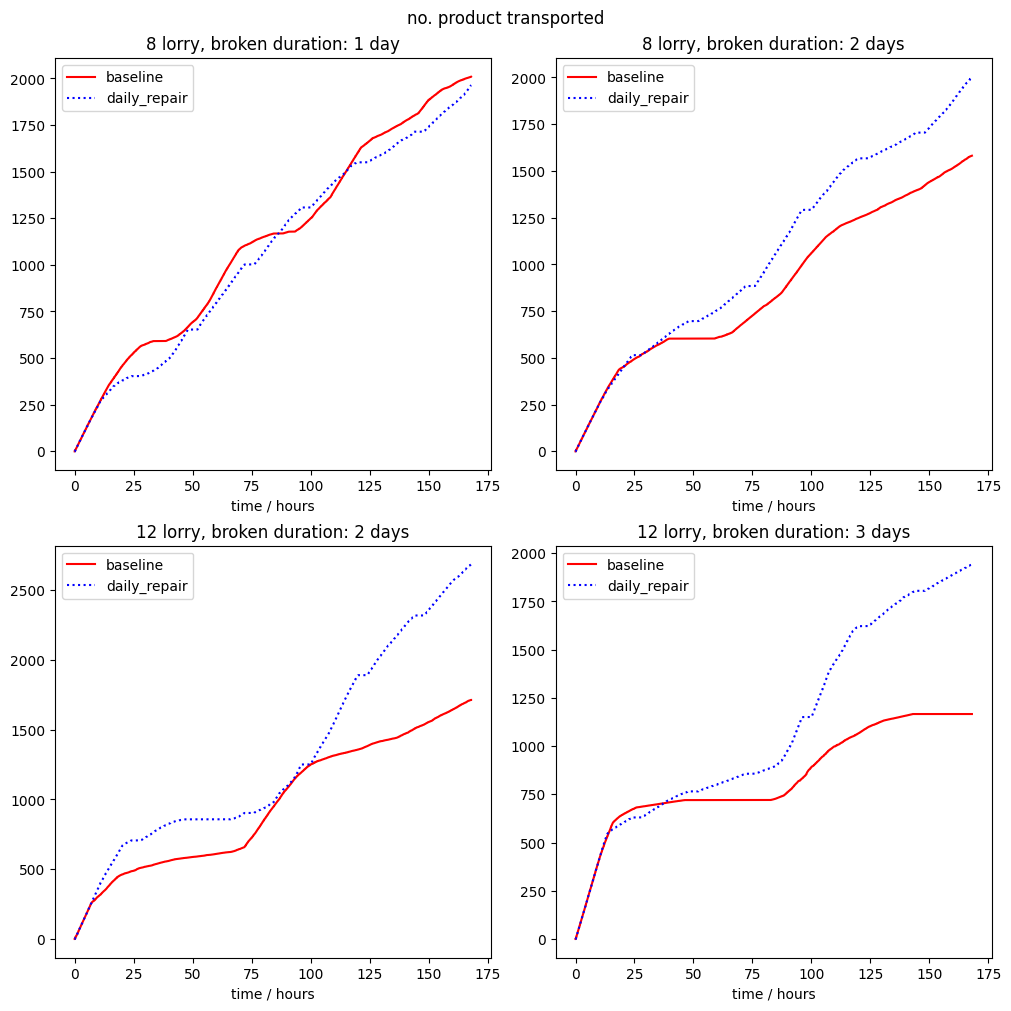

In [6]:
lorry8_b1_base = pd.read_csv('result/8lorry_capacity-0.5_broken-1.0_mdp-1.0/baseline/result.csv')
lorry8_b1_repair = pd.read_csv('result/8lorry_capacity-0.5_broken-1.0_mdp-1.0/repair/result.csv')

lorry8_b2_base = pd.read_csv('result/8lorry_capacity-0.5_broken-2.0_mdp-1.0/baseline/result.csv')
lorry8_b2_repair = pd.read_csv('result/8lorry_capacity-0.5_broken-2.0_mdp-1.0/repair/result.csv')

lorry12_b2_base = pd.read_csv('result/12lorry_capacity-0.5_broken-2.0_mdp-1.0/baseline/result.csv')
lorry12_b2_repair = pd.read_csv('result/12lorry_capacity-0.5_broken-2.0_mdp-1.0/repair/result.csv')

lorry12_b3_base = pd.read_csv('result/12lorry_capacity-0.5_broken-3.0_mdp-1.0/baseline/result.csv')
lorry12_b3_repair = pd.read_csv('result/12lorry_capacity-0.5_broken-3.0_mdp-1.0/repair/result.csv')

compare_plt = [[lorry8_b1_base,lorry8_b1_repair],[lorry8_b2_base,lorry8_b2_repair],[lorry12_b2_base,lorry12_b2_repair],[lorry12_b3_base,lorry12_b3_repair]]
compare_title = ['8 lorry, broken duration: 1 day','8 lorry, broken duration: 2 days','12 lorry, broken duration: 2 days','12 lorry, broken duration: 3 days']

fig, axs = plt.subplots(2,2, figsize=(10,10), constrained_layout=True)
for ax, tmp_plt, tmp_name in zip(axs.flatten(),compare_plt,compare_title):
    ax.plot(tmp_plt[0]['time'].values, (tmp_plt[0]['A'] + tmp_plt[0]['P12'] + tmp_plt[0]['B'] + tmp_plt[0]['P23']).values,'r-', label='baseline')
    ax.plot(tmp_plt[1]['time'].values, (tmp_plt[1]['A'] + tmp_plt[1]['P12'] + tmp_plt[1]['B'] + tmp_plt[1]['P23']).values,'b:', label='daily_repair')
    ax.set_xlabel('time / hours')
    ax.legend()
    ax.set_title(tmp_name)
fig.suptitle('no. product transported')

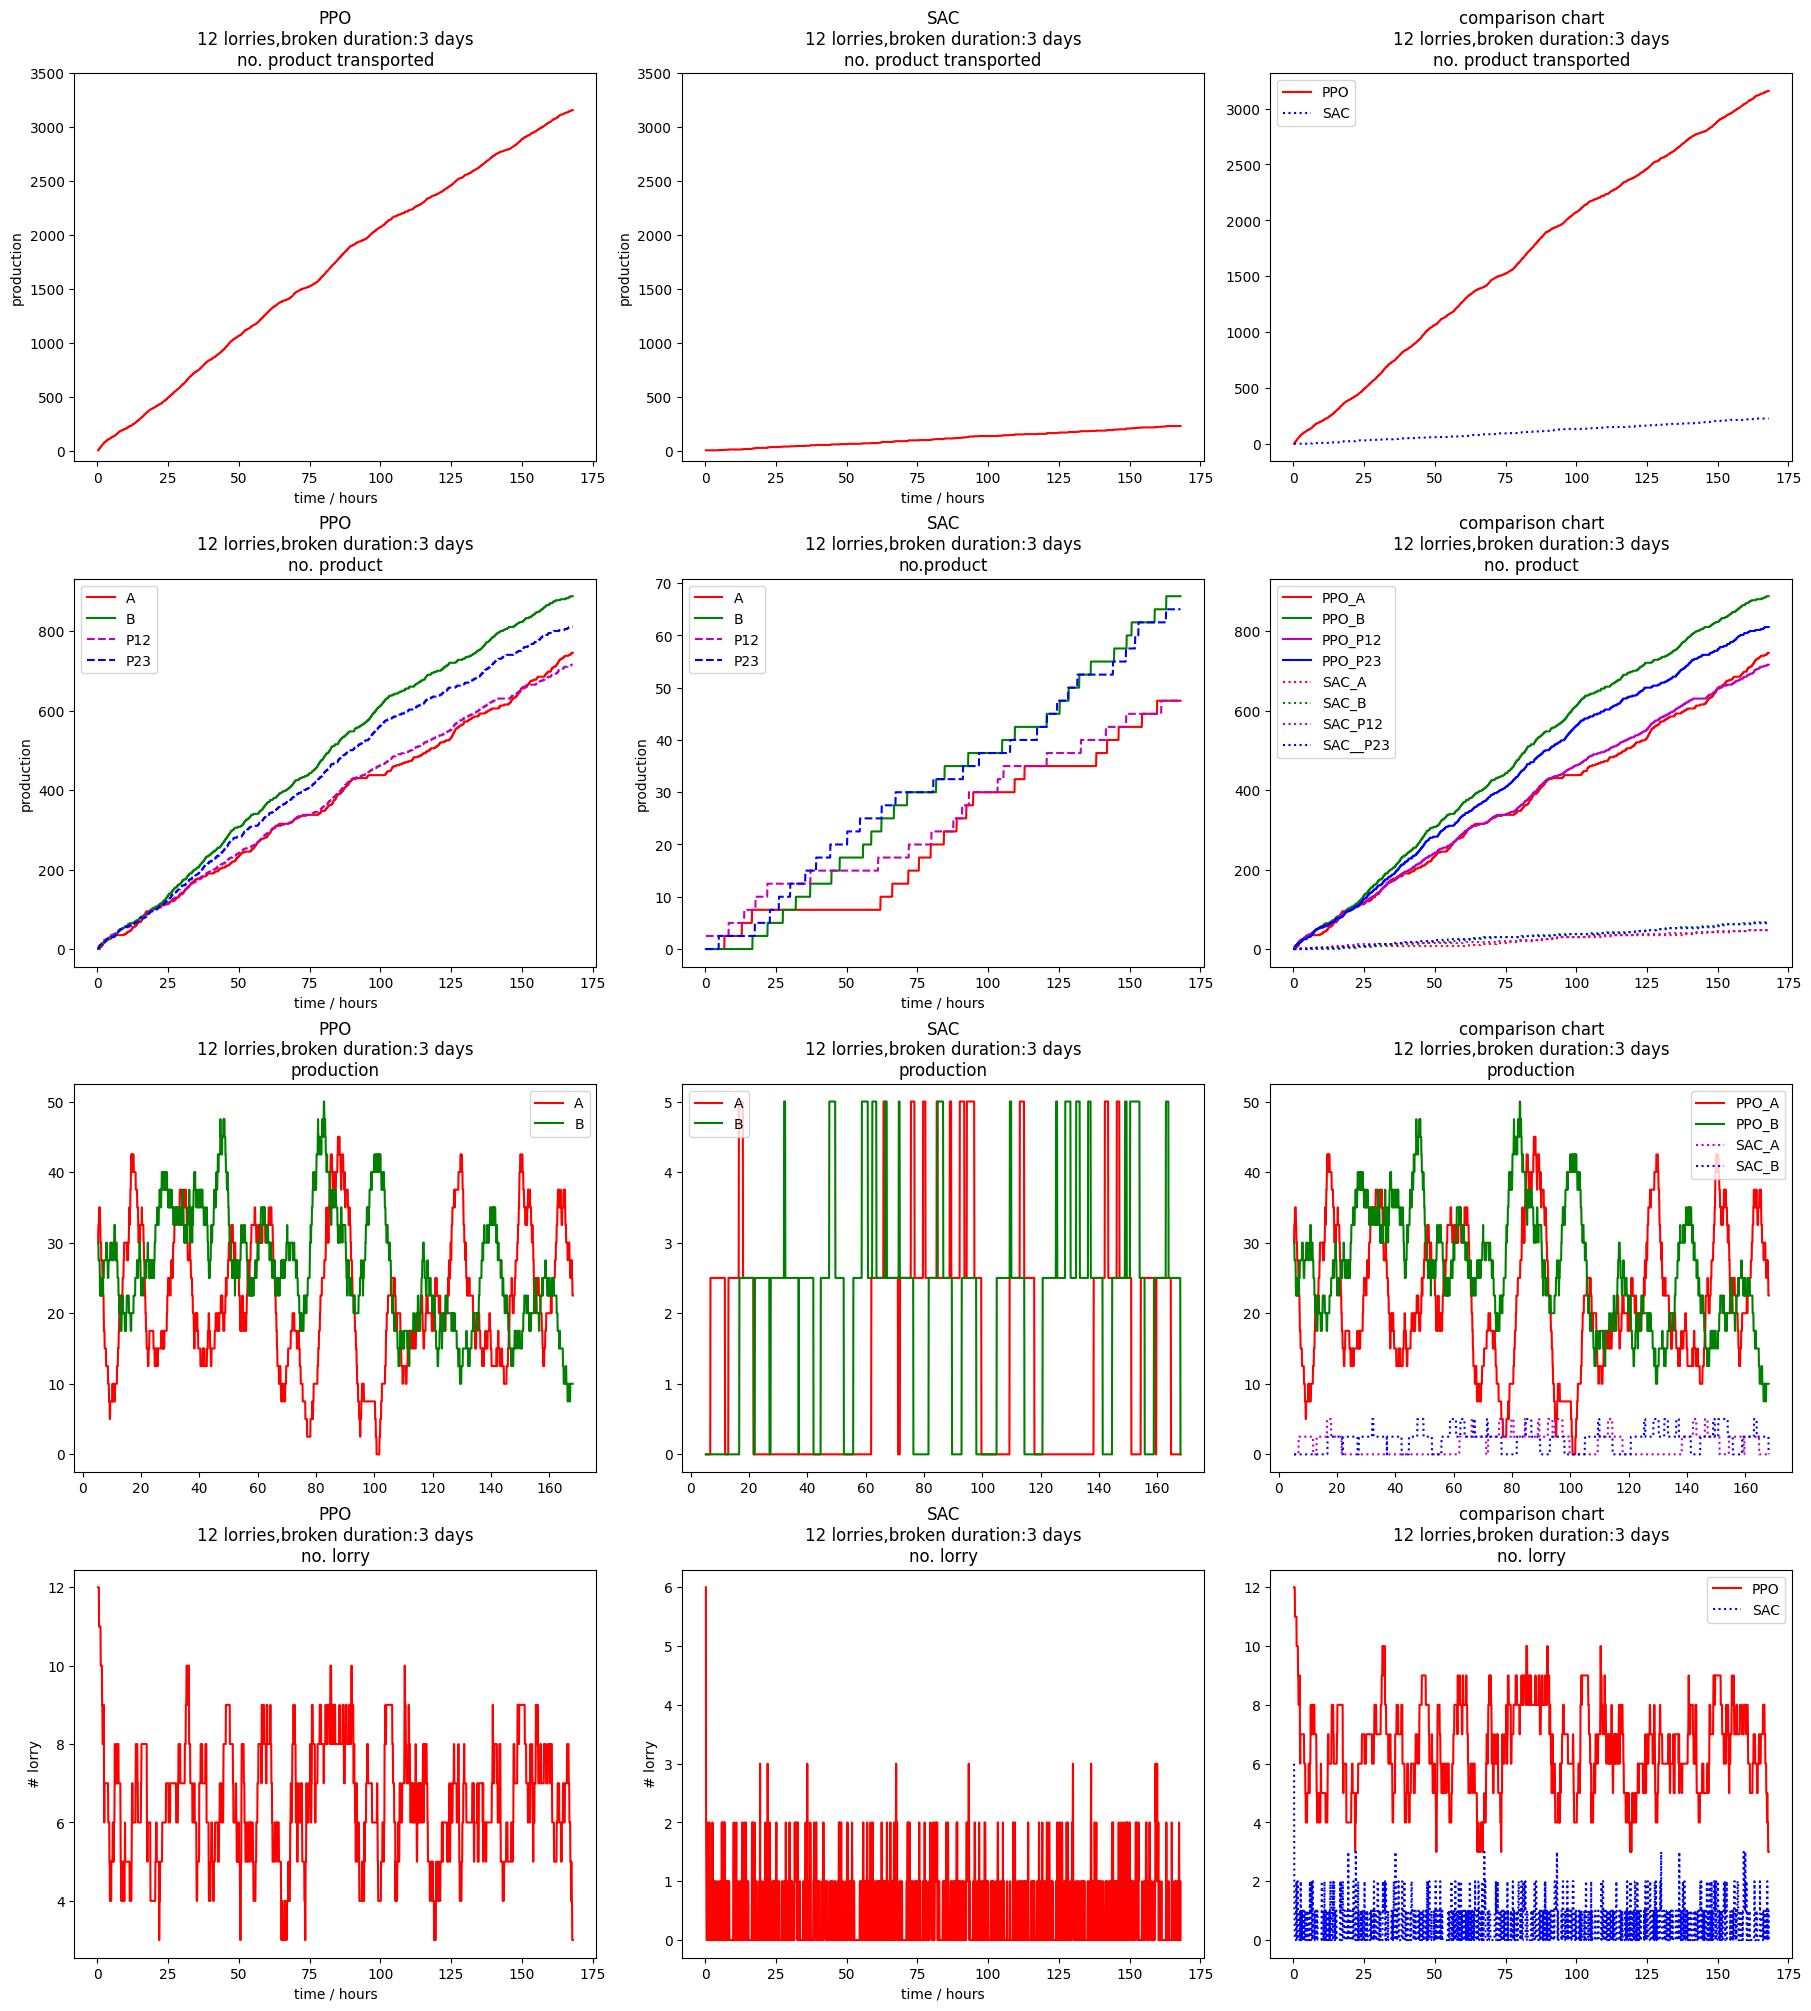

In [13]:
folder = 'result/12lorry_capacity-0.5_broken-3.0_mdp-1.0/'
baseline = pd.read_csv('result/RL-PPO/result.csv')
daily = pd.read_csv('result/RL-SAC/result.csv')
# daily['time'] = daily['time'] / 3600
plt_result = [baseline,daily]
result_name = ['PPO\n12 lorries,broken duration:3 days\nno. product','SAC\n12 lorries,broken duration:3 days\nno.product']

average_periods = 60
baseline_rate = baseline.diff(periods=average_periods)
daily_rate = daily.diff(periods=average_periods)
plt_rate = [baseline_rate, daily_rate]
rate_name = ['PPO\n12 lorries,broken duration:3 days\nproduction','SAC\n12 lorries,broken duration:3 days\nproduction']

# Transproted product
trans_name = ['PPO\n12 lorries,broken duration:3 days\nno. product transported','SAC\n12 lorries,broken duration:3 days\nno. product transported']
fig, axs = plt.subplots(4,3, figsize=(18,20), constrained_layout=True)

for ax, tmp_plt, tmp_name in zip(axs[0,0:2].flatten(),plt_result,trans_name):
    ax.plot(tmp_plt['time'].values, (tmp_plt['A']+tmp_plt['P12']+tmp_plt['B']+tmp_plt['P23']).values,'r-')
    ax.set_xlabel('time / hours')
    ax.set_ylabel('production')
    ax.set_ylim([-100,3500])
    ax.set_title(tmp_name)

axs[0,2].plot(baseline['time'].values, (baseline['A'] + baseline['P12'] + baseline['B'] + baseline['P23']).values,'r-', label='PPO')
axs[0,2].plot(daily['time'].values, (daily['A'] + daily['P12'] + daily['B'] + daily['P23']).values,'b:', label='SAC')
axs[0,2].legend()
axs[0,2].set_title('comparison chart\n12 lorries,broken duration:3 days\nno. product transported')


for ax, tmp_plt, tmp_name in zip(axs[1,0:2].flatten(),plt_result,result_name):
    ax.plot(tmp_plt['time'].values, tmp_plt['A'].values,'r-', label='A')
    ax.plot(tmp_plt['time'].values, tmp_plt['B'].values,'g-', label='B')
    ax.plot(tmp_plt['time'].values, tmp_plt['P12'].values,'m--', label='P12')
    ax.plot(tmp_plt['time'].values, tmp_plt['P23'].values,'b--', label='P23')
    ax.set_xlabel('time / hours')
    ax.set_ylabel('production')
    # ax.set_ylim([0,1500])
    ax.legend()
    ax.set_title(tmp_name)
    
axs[1,2].plot(baseline['time'].values, baseline['A'].values,'r-', label='PPO_A')
axs[1,2].plot(baseline['time'].values, baseline['B'].values,'g-', label='PPO_B')
axs[1,2].plot(baseline['time'].values, baseline['P12'].values,'m-', label='PPO_P12')
axs[1,2].plot(baseline['time'].values, baseline['P23'].values,'b-', label='PPO_P23')

axs[1,2].plot(daily['time'].values, daily['A'].values,'r:', label='SAC_A')
axs[1,2].plot(daily['time'].values, daily['B'].values,'g:', label='SAC_B')
axs[1,2].plot(daily['time'].values, daily['P12'].values,'m:', label='SAC_P12')
axs[1,2].plot(daily['time'].values, daily['P23'].values,'b:', label='SAC__P23')
# axs[0,2].set_ylim([0,1500])
axs[1,2].legend()
axs[1,2].set_title('comparison chart\n12 lorries,broken duration:3 days\nno. product')



for ax, tmp_plt, tmp_name, tmp_result in zip(axs[2,0:2].flatten(),plt_rate,rate_name, plt_result):
    ax.plot(tmp_result['time'].values, tmp_plt['A'].values,'r-', label='A')
    ax.plot(tmp_result['time'].values, tmp_plt['B'].values,'g-', label='B')
    ax.set_title(tmp_name)
    ax.legend()

axs[2,2].plot(baseline['time'].values, baseline_rate['A'].values,'r-', label='PPO_A')
axs[2,2].plot(baseline['time'].values, baseline_rate['B'].values,'g-', label='PPO_B')
axs[2,2].plot(daily['time'].values, daily_rate['A'].values,'m:', label='SAC_A')
axs[2,2].plot(daily['time'].values, daily_rate['B'].values,'b:', label='SAC_B')
axs[2,2].set_title('comparison chart\n12 lorries,broken duration:3 days\nproduction')
axs[2,2].legend()

lorry_no_name = ['PPO\n12 lorries,broken duration:3 days\nno. lorry','SAC\n12 lorries,broken duration:3 days\nno. lorry']
for ax, tmp_plt,tmp_name in zip(axs[3,0:2].flatten(), plt_result, lorry_no_name):
    ax.plot(tmp_plt['time'].values, tmp_plt['current_lorry'].values, 'r-')
    ax.set_xlabel('time / hours')
    ax.set_ylabel('# lorry')
    ax.set_title(tmp_name)
    # ax.set_ylim([0,6])

axs[3,2].plot(baseline['time'].values,baseline['current_lorry'].values, 'r-', label='PPO')
axs[3,2].plot(daily['time'].values,daily['current_lorry'].values, 'b:', label='SAC')
axs[3,2].set_title('comparison chart\n12 lorries,broken duration:3 days\nno. lorry')
axs[3,2].legend()


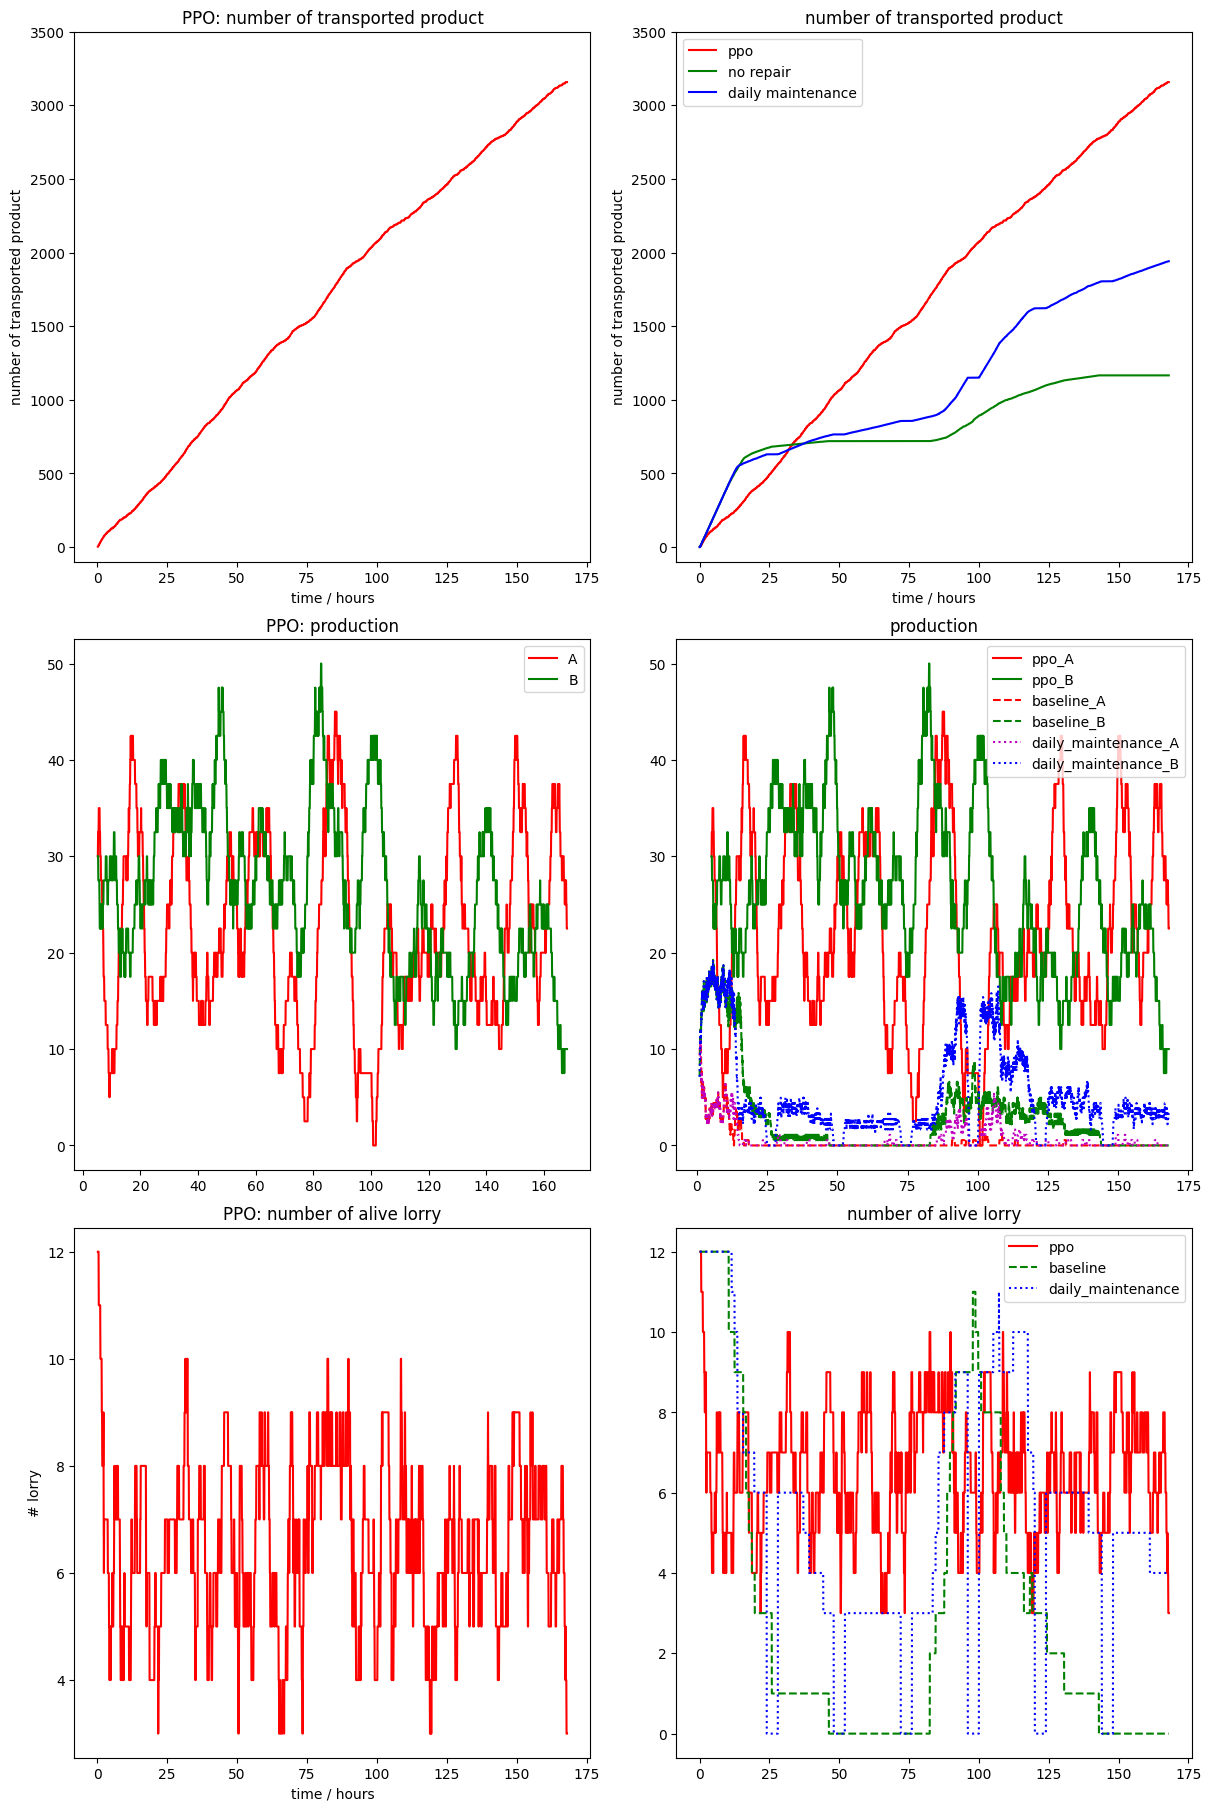

In [8]:
folder = 'result/12lorry_capacity-0.5_broken-3.0_mdp-1.0/'
baseline = pd.read_csv(folder + 'baseline/result.csv')
daily = pd.read_csv(folder + 'repair/result.csv')
ppo = pd.read_csv('result/RL-PPO/result.csv')
# daily['time'] = daily['time'] / 3600


average_periods = 60
baseline_rate = baseline.diff(periods=average_periods)
daily_rate = daily.diff(periods=average_periods)
ppo_rate = ppo.diff(periods=average_periods)

fig, axs = plt.subplots(3,2, figsize=(12,18), constrained_layout=True)
axs[0,0].plot(ppo['time'].values, (ppo['A']+ppo['P12']+ppo['B']+ppo['P23']).values,'r-')
axs[0,0].set_xlabel('time / hours')
axs[0,0].set_ylabel('number of transported product')
axs[0,0].set_ylim([-100,3500])
axs[0,0].set_title('PPO: number of transported product')

axs[0,1].plot(ppo['time'].values, (ppo['A']+ppo['P12']+ppo['B']+ppo['P23']).values,'r-', label='ppo')
axs[0,1].plot(baseline['time'].values, (baseline['A']+baseline['P12']+baseline['B']+baseline['P23']).values,'g-',label='no repair')
axs[0,1].plot(daily['time'].values, (daily['A']+daily['P12']+daily['B']+daily['P23']).values,'b-',label='daily maintenance')
axs[0,1].set_xlabel('time / hours')
axs[0,1].set_ylabel('number of transported product')
axs[0,1].set_ylim([-100,3500])
axs[0,1].set_title('number of transported product')
axs[0,1].legend()



axs[1,0].plot(ppo['time'].values, ppo_rate['A'].values,'r-', label='A')
axs[1,0].plot(ppo['time'].values, ppo_rate['B'].values,'g-', label='B')
axs[1,0].set_title('PPO: production')
axs[1,0].legend()

axs[1,1].plot(ppo['time'].values, ppo_rate['A'].values,'r-', label='ppo_A')
axs[1,1].plot(ppo['time'].values, ppo_rate['B'].values,'g-', label='ppo_B')
axs[1,1].plot(baseline['time'].values, baseline_rate['A'].values,'r--', label='baseline_A')
axs[1,1].plot(baseline['time'].values, baseline_rate['B'].values,'g--', label='baseline_B')
axs[1,1].plot(daily['time'].values, daily_rate['A'].values,'m:', label='daily_maintenance_A')
axs[1,1].plot(daily['time'].values, daily_rate['B'].values,'b:', label='daily_maintenance_B')
axs[1,1].set_title('production')
axs[1,1].legend()

axs[2,0].plot(ppo['time'].values, ppo['current_lorry'].values, 'r-')
axs[2,0].set_xlabel('time / hours')
axs[2,0].set_ylabel('# lorry')
axs[2,0].set_title('PPO: number of alive lorry')

axs[2,1].plot(ppo['time'].values,ppo['current_lorry'].values, 'r-', label='ppo')
axs[2,1].plot(baseline['time'].values,baseline['current_lorry'].values, 'g--', label='baseline')
axs[2,1].plot(daily['time'].values,daily['current_lorry'].values, 'b:', label='daily_maintenance')
axs[2,1].set_title('number of alive lorry')
axs[2,1].legend()
